# Importing the libraries

In [684]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Getting the data

In [686]:
credit_risk_data= pd.read_csv(r"C:\Users\balod\Quant Finance Projects\Credit Risk Modelling\credit_risk_dataset.csv")
credit_risk_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Exploring & cleaning the data

In [688]:
credit_risk_data.shape

(32581, 12)

In [689]:
credit_risk_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Visualizing the data

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_status'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>, <Axes: >]],
      dtype=object)

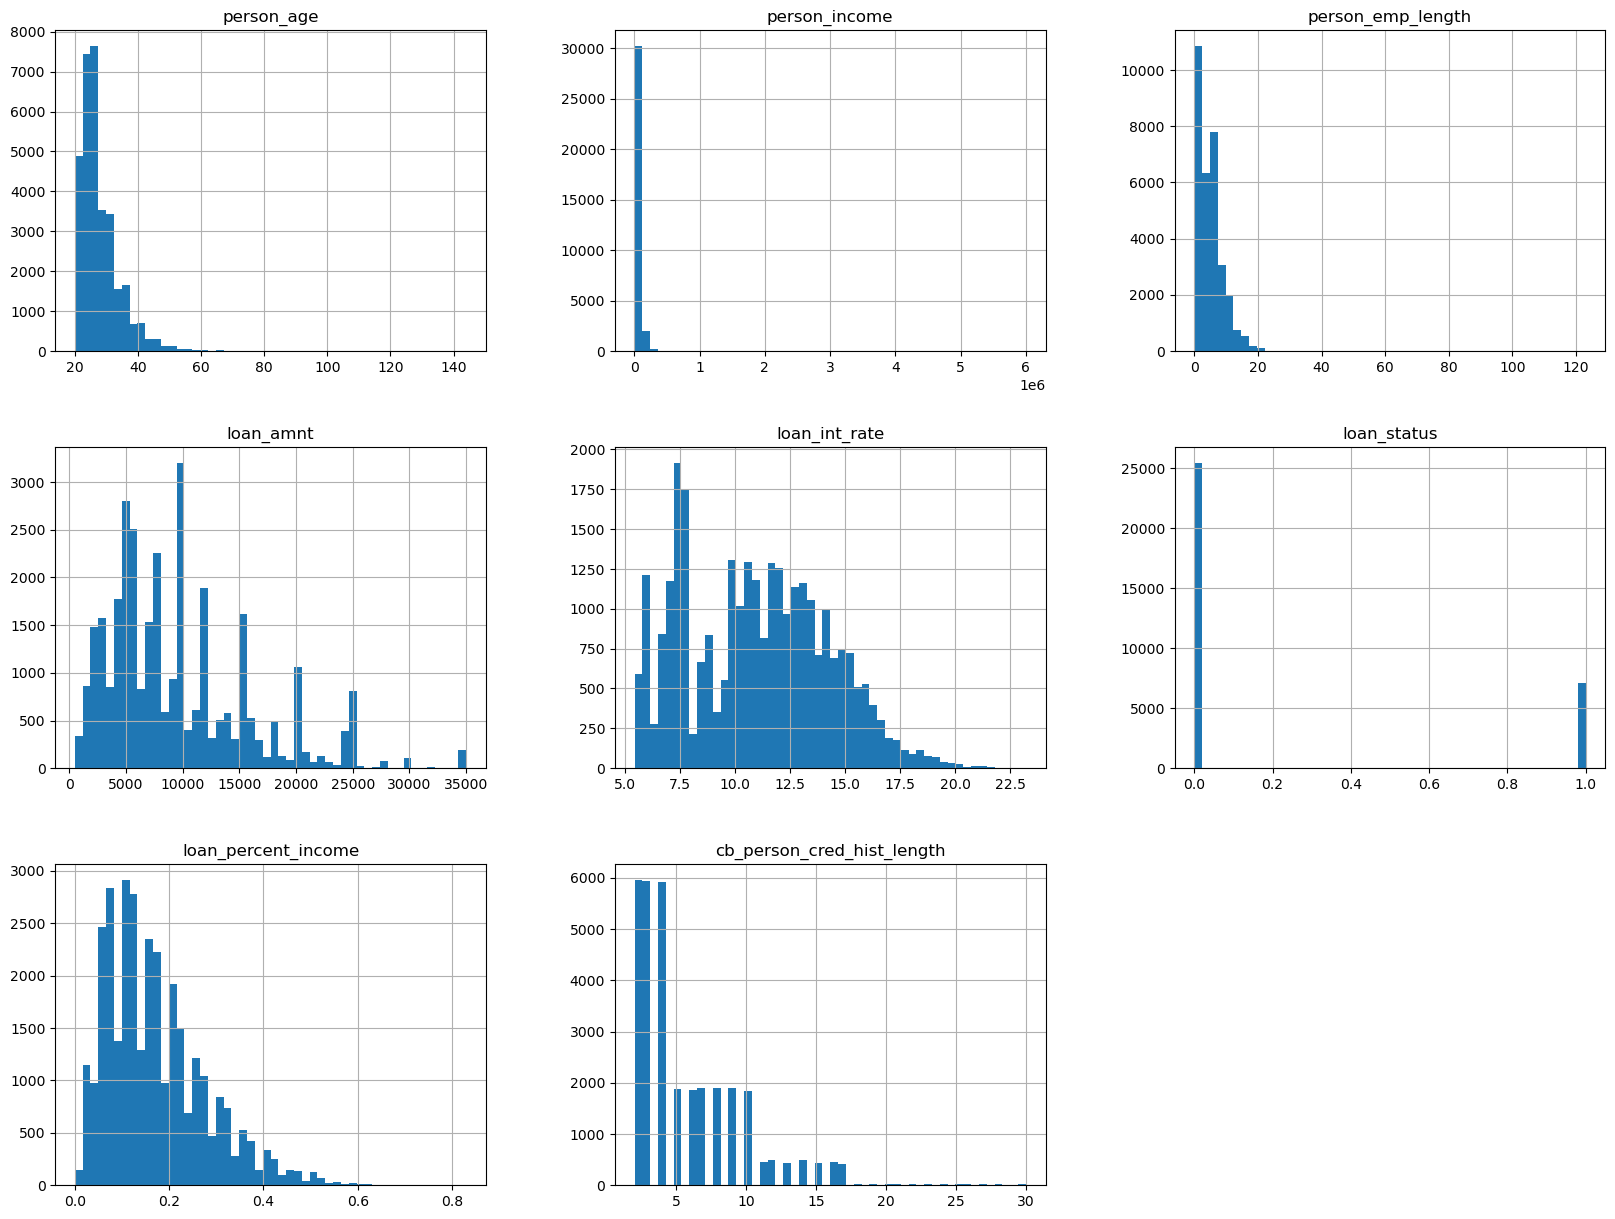

In [691]:
credit_risk_data.hist(bins= 50, figsize= (20, 15))

## Dealing with the outliers

In [693]:
credit_risk_data_copy= credit_risk_data.copy()

In [694]:
credit_risk_data_copy.pivot_table(index="person_age", columns="loan_status", values="person_income", aggfunc="count").sort_values(by="person_age", ascending=0)

loan_status,0,1
person_age,,
144,3.0,NaN
123,2.0,NaN
94,1.0,NaN
84,1.0,NaN
80,1.0,NaN
78,1.0,NaN
76,1.0,NaN
73,3.0,NaN
70,5.0,2.0


In [695]:
credit_risk_data_cleaned= credit_risk_data_copy[credit_risk_data_copy["person_age"]<=80]
credit_risk_data_cleaned= credit_risk_data_cleaned.reset_index(drop=1)
# credit_risk_data_cleaned.head()

In [696]:
credit_risk_data_cleaned.shape

(32574, 12)

In [697]:
credit_risk_data_cleaned.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32574.000000,3.257400e+04,31679.000000,32574.000000,29460.000000,32574.000000,32574.000000,32574.000000
mean,27.714281,6.588254e+04,4.789735,9589.199975,11.011666,0.218211,0.170211,5.802757
std,6.186447,5.253584e+04,4.142752,6322.057346,3.240614,0.413038,0.106779,4.050959
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,80.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [698]:
credit_risk_data_cleaned.pivot_table(index="person_emp_length", columns="loan_status", values="person_income", aggfunc="count").sort_values(by="person_emp_length", ascending=0)

loan_status,0,1
person_emp_length,,
123.0,1.0,1.0
41.0,1.0,NaN
38.0,1.0,NaN
34.0,NaN,1.0
31.0,4.0,NaN
30.0,1.0,1.0
29.0,NaN,1.0
28.0,3.0,NaN
27.0,4.0,1.0


In [699]:
credit_risk_data_cleaned= credit_risk_data_cleaned[credit_risk_data_cleaned["person_emp_length"]<=40]
credit_risk_data_cleaned= credit_risk_data_cleaned.reset_index(drop=1)
# credit_risk_data_cleaned.head()

In [700]:
credit_risk_data_cleaned.shape

(31676, 12)

In [701]:
credit_risk_data_cleaned.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31676.000000,3.167600e+04,31676.000000,31676.000000,28630.000000,31676.000000,31676.000000,31676.000000
mean,27.725218,6.649113e+04,4.781128,9660.261712,11.039948,0.215463,0.169612,5.807362
std,6.188046,5.277041e+04,4.029918,6334.524809,3.229387,0.411150,0.106270,4.055435
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.938100e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,80.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [702]:
credit_risk_data_cleaned_copy= credit_risk_data_cleaned.copy()

In [703]:
credit_risk_data_cleaned_copy.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3046
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [704]:
credit_risk_data_cleaned_copy= credit_risk_data_cleaned_copy.fillna({"loan_int_rate":credit_risk_data_cleaned_copy["loan_int_rate"].median()})

In [705]:
credit_risk_data_cleaned_copy.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [706]:
credit_risk_data_cleaned_copy.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31676.000000,3.167600e+04,31676.000000,31676.000000,31676.000000,31676.000000,31676.000000,31676.000000
mean,27.725218,6.649113e+04,4.781128,9660.261712,11.035145,0.215463,0.169612,5.807362
std,6.188046,5.277041e+04,4.029918,6334.524809,3.070223,0.411150,0.106270,4.055435
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.938100e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,80.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [707]:
credit_risk_data_cleaned_copy.shape

(31676, 12)

# Preparing the data

## Encoding the categorical variables

In [710]:
credit_risk_data_cleaned_copy.groupby("person_home_ownership").count()["person_income"]

person_home_ownership
MORTGAGE    13089
OTHER         107
OWN          2410
RENT        16070
Name: person_income, dtype: int64

In [711]:
credit_risk_data_cleaned_copy.groupby("loan_grade").count()["person_income"]

loan_grade
A    10368
B    10183
C     6318
D     3555
E      952
F      236
G       64
Name: person_income, dtype: int64

In [712]:
credit_risk_data_cleaned_copy.groupby("cb_person_default_on_file").count()["person_income"]

cb_person_default_on_file
N    26048
Y     5628
Name: person_income, dtype: int64

In [713]:
credit_risk_data_cleaned_copy.groupby("loan_intent").count()["person_income"]

loan_intent
DEBTCONSOLIDATION    5064
EDUCATION            6288
HOMEIMPROVEMENT      3510
MEDICAL              5895
PERSONAL             5366
VENTURE              5553
Name: person_income, dtype: int64

In [714]:
credit_risk_data_cleaned_copy["cb_person_default_on_file"]= np.where(credit_risk_data_cleaned_copy["cb_person_default_on_file"]=="N",0,1)
credit_risk_data_cleaned_copy.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,0,2


In [715]:
person_home_ownership_df= pd.get_dummies(credit_risk_data_cleaned_copy["person_home_ownership"]).astype(int)
loan_intent_df= pd.get_dummies(credit_risk_data_cleaned_copy["loan_intent"]).astype(int)
loan_grade_df= pd.get_dummies(credit_risk_data_cleaned_copy["loan_grade"]).astype(int)

## Scaling the numerical variables

In [717]:
data_to_scale= credit_risk_data_cleaned_copy[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]
data_to_scale.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,21,9600,5.0,1000,11.14,0.10,2
1,25,9600,1.0,5500,12.87,0.57,3
2,23,65500,4.0,35000,15.23,0.53,2
3,24,54400,8.0,35000,14.27,0.55,4
4,21,9900,2.0,2500,7.14,0.25,2


In [718]:
scaler= StandardScaler()
scaled_data= scaler.fit_transform(data_to_scale)
scaled_data= pd.DataFrame(scaled_data, columns=["person_age",	"person_income",	"person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"])
scaled_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-1.086825,-1.078105,0.054313,-1.367174,0.034153,-0.655061,-0.938844
1,-0.440407,-1.078105,-0.938279,-0.656770,0.597639,3.767701,-0.692258
2,-0.763616,-0.018782,-0.193835,4.000322,1.366325,3.391296,-0.938844
3,-0.602012,-0.229131,0.798756,4.000322,1.053639,3.579498,-0.445671
4,-1.086825,-1.072420,-0.690131,-1.130373,-1.268705,0.756459,-0.938844


In [719]:
credit_risk_data_scaled_encoded= pd.concat([scaled_data, person_home_ownership_df, loan_intent_df, loan_grade_df], axis=1)
credit_risk_data_scaled_encoded["cb_person_default_on_file"]= credit_risk_data_cleaned_copy["cb_person_default_on_file"]
credit_risk_data_scaled_encoded["loan_status"]= credit_risk_data_cleaned_copy["loan_status"]
credit_risk_data_scaled_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,MORTGAGE,OTHER,OWN,...,VENTURE,A,B,C,D,E,F,G,cb_person_default_on_file,loan_status
0,-1.086825,-1.078105,0.054313,-1.367174,0.034153,-0.655061,-0.938844,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,-0.440407,-1.078105,-0.938279,-0.656770,0.597639,3.767701,-0.692258,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.763616,-0.018782,-0.193835,4.000322,1.366325,3.391296,-0.938844,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,-0.602012,-0.229131,0.798756,4.000322,1.053639,3.579498,-0.445671,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,-1.086825,-1.072420,-0.690131,-1.130373,-1.268705,0.756459,-0.938844,0,0,1,...,1,1,0,0,0,0,0,0,0,1


## Data balancing

In [721]:
credit_risk_data_scaled_encoded.groupby("loan_status").count()["person_age"]

loan_status
0    24851
1     6825
Name: person_age, dtype: int64

In [722]:
features= credit_risk_data_scaled_encoded.drop(columns= ["loan_status"])
features.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,MORTGAGE,OTHER,OWN,...,PERSONAL,VENTURE,A,B,C,D,E,F,G,cb_person_default_on_file
0,-1.086825,-1.078105,0.054313,-1.367174,0.034153,-0.655061,-0.938844,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,-0.440407,-1.078105,-0.938279,-0.656770,0.597639,3.767701,-0.692258,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-0.763616,-0.018782,-0.193835,4.000322,1.366325,3.391296,-0.938844,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.602012,-0.229131,0.798756,4.000322,1.053639,3.579498,-0.445671,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-1.086825,-1.072420,-0.690131,-1.130373,-1.268705,0.756459,-0.938844,0,0,1,...,0,1,1,0,0,0,0,0,0,0


In [723]:
target= credit_risk_data_scaled_encoded["loan_status"]
target.head()

0    0
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [724]:
smote= SMOTE()
balanced_features, balanced_target= smote.fit_resample(features, target)
balanced_features.shape

(49702, 25)

In [725]:
balanced_target.shape

(49702,)

In [726]:
balanced_features_df= pd.DataFrame(balanced_features)
balanced_features_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,MORTGAGE,OTHER,OWN,...,PERSONAL,VENTURE,A,B,C,D,E,F,G,cb_person_default_on_file
0,-1.086825,-1.078105,0.054313,-1.367174,0.034153,-0.655061,-0.938844,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,-0.440407,-1.078105,-0.938279,-0.656770,0.597639,3.767701,-0.692258,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-0.763616,-0.018782,-0.193835,4.000322,1.366325,3.391296,-0.938844,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.602012,-0.229131,0.798756,4.000322,1.053639,3.579498,-0.445671,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-1.086825,-1.072420,-0.690131,-1.130373,-1.268705,0.756459,-0.938844,0,0,1,...,0,1,1,0,0,0,0,0,0,0


In [727]:
balanced_target_df= pd.DataFrame(balanced_target)
balanced_target_df.head()

,loan_status
0,0
1,1
2,1
3,1
4,1


In [728]:
balanced_target_df.groupby("loan_status").size()

loan_status
0    24851
1    24851
dtype: int64

# Model Training- Logistic Model

## Splitting the data into training and testing sets

In [731]:
x_train, x_test, y_train, y_test= train_test_split(balanced_features, balanced_target, test_size= 0.2, random_state= 42)

In [732]:
logit= LogisticRegression()
logit.fit(x_train, y_train)
y_predict= logit.predict(x_test)

In [733]:
training_accuracy= logit.score(x_train, y_train)
test_accuracy= logit.score(x_test, y_test)
print(f"Training accuracy: {round(training_accuracy, 3)}")
print(f"Test accuracy: {round(test_accuracy, 3)}")

Training accuracy: 0.824
Test accuracy: 0.824


Text(0.5, 1.0, 'Logistic Regression ROC Curve')

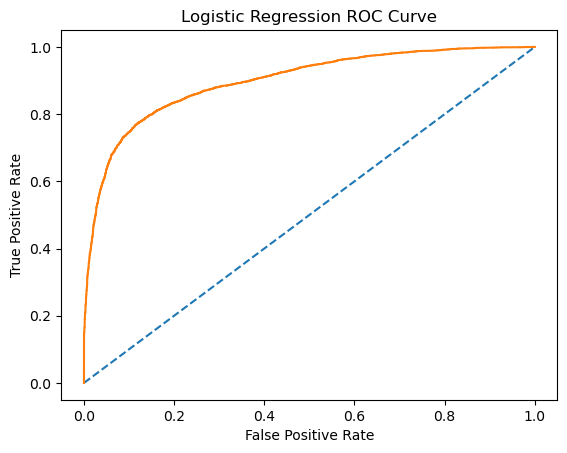

In [734]:
pred_probs= logit.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, pred_probs)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')

In [735]:
auc_score= roc_auc_score(y_test, pred_probs)
print(f"AUC score: {round(auc_score, 3)}")

AUC score: 0.898


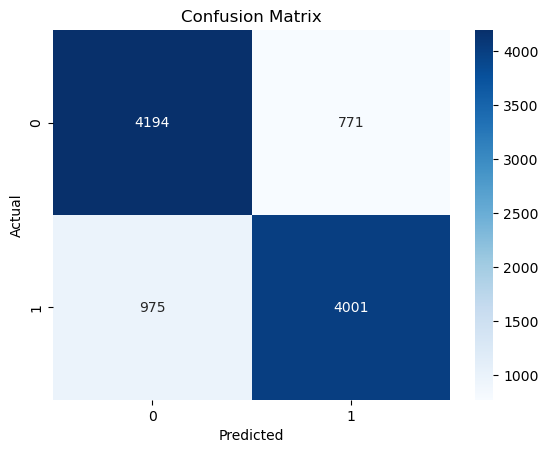

In [736]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [737]:
print("Classification report:")
print(classification_report(y_test, y_predict))

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      4965
           1       0.84      0.80      0.82      4976

    accuracy                           0.82      9941
   macro avg       0.82      0.82      0.82      9941
weighted avg       0.82      0.82      0.82      9941



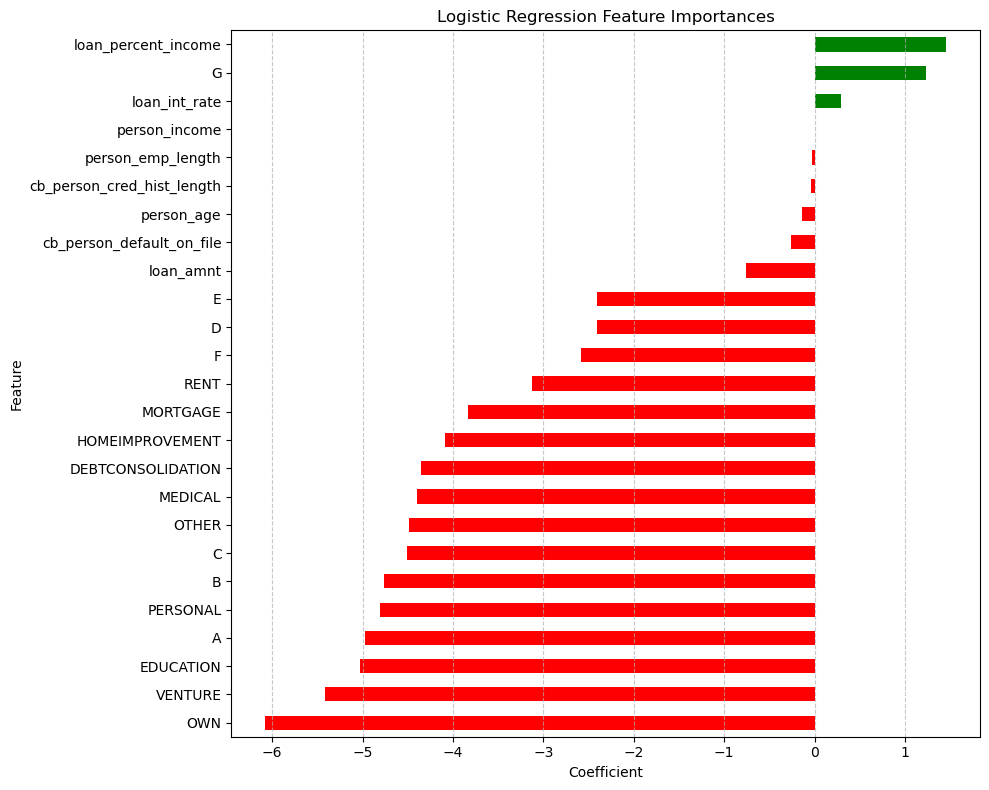

In [738]:
logit_feature_importance= pd.DataFrame({"features":balanced_features.columns, "feature_coefficient": logit.coef_[0]})
logit_feature_importance_sorted= logit_feature_importance.sort_values(by= "feature_coefficient", ascending= False)

logit_feature_importance_sorted.plot(kind='barh', x='features', y='feature_coefficient', legend=False, figsize=(10, 8), color=logit_feature_importance_sorted['feature_coefficient'].apply(lambda x: 'green' if x > 0 else 'red'))

plt.title('Logistic Regression Feature Importances')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.gca().invert_yaxis()  # Optional: largest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [739]:
logit_prediction_df= pd.DataFrame({"test_indices": x_test.index, "logit_prediction": y_predict})
logit_prediction_df.head()

,test_indices,logit_prediction
0,43736,1
1,13631,1
2,28392,0
3,37342,1
4,13342,0


In [740]:
credit_risk_data_merged= credit_risk_data_cleaned.merge(logit_prediction_df, left_index= True, right_on= "test_indices", how="left")
credit_risk_data_merged.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,test_indices,logit_prediction
NaN,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,NaN
9841.0,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,1.0
NaN,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,2,NaN
NaN,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,3,NaN
476.0,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,4,0.0


In [741]:
final_data_with_prediction= credit_risk_data_merged.dropna()
final_data_with_prediction= final_data_with_prediction.reset_index()
final_data_with_prediction= final_data_with_prediction.drop(columns=["index", "test_indices"])
final_data_with_prediction.shape

(5762, 13)

In [742]:
final_data_with_prediction.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,logit_prediction
0,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1.0
1,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0.0
2,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,1.0
3,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,0.0
4,24,12000,OWN,4.0,VENTURE,B,2500,12.69,1,0.21,N,3,0.0


In [743]:
# final_data_with_prediction.to_excel(r"C:\Users\balod\Quant Finance Projects\Credit Risk Modelling\pd_prediction.xlsx", index=False)